In [4]:
import pandas as pd
import os
import category_encoders as ce

In [5]:
os.chdir("../")

In [6]:
df = pd.read_csv("train.csv")



In [7]:
!cd


c:\Users\Hp\OneDrive\Documents\GitHub\ml_project


In [8]:
df['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [9]:
encoder = ce.TargetEncoder(cols=['Item_Identifier'])
df['Item_Identifier_encoded'] = encoder.fit_transform(df['Item_Identifier'], df['Item_Outlet_Sales'])

c:\Users\Hp\OneDrive\Documents\GitHub\ml_project\.venv\lib\site-packages\category_encoders\ordinal.py:306: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna(-1, inplace=True)
c:\Users\Hp\OneDrive\Documents\GitHub\ml_project\.venv\lib\site-packages\category_encoders\ordinal.py:306: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

In [10]:
df['Item_Identifier_encoded'] = df['Item_Identifier_encoded'].astype('int')

In [11]:
df[['Item_Identifier', 'Item_Identifier_encoded']]

,Item_Identifier,Item_Identifier_encoded
0,FDA15,5195
1,DRC01,871
2,FDN15,1479
3,FDX07,3015
4,NCD19,664
...,...,...
8518,FDF22,3231
8519,FDS36,2633
8520,NCJ29,1227
8521,FDN46,2068


In [12]:
src_column = 'Item_Type'
target_column = f'{src_column}_encoded'
encoder = ce.TargetEncoder(cols=[src_column])
df[target_column] = encoder.fit_transform(df[src_column], df['Item_Outlet_Sales'])
df[target_column] = df[target_column].astype('int')
df[[src_column, target_column]]

c:\Users\Hp\OneDrive\Documents\GitHub\ml_project\.venv\lib\site-packages\category_encoders\ordinal.py:306: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna(-1, inplace=True)
c:\Users\Hp\OneDrive\Documents\GitHub\ml_project\.venv\lib\site-packages\category_encoders\ordinal.py:306: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

,Item_Type,Item_Type_encoded
0,Dairy,2232
1,Soft Drinks,2006
2,Meat,2158
3,Fruits and Vegetables,2289
4,Household,2258
...,...,...
8518,Snack Foods,2277
8519,Baking Goods,1952
8520,Health and Hygiene,2010
8521,Snack Foods,2277


In [14]:
src_column = 'Item_Fat_Content'
target_column = f'{src_column}_encoded'
df[target_column] = df[src_column].map({
    'Low Fat': "LF",
    'Regular': "REG",
    'reg': "REG",
    'low fat': "LF"
})

df = pd.get_dummies(df, columns=[target_column], dtype=int)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_encoded,Item_Type_encoded,Item_Fat_Content_encoded_LF,Item_Fat_Content_encoded_REG,Item_Fat_Content_encoded_Unknown,Item_Fat_Content_encoded_LF,Item_Fat_Content_encoded_REG
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,5195,2232,1,0,0,1,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,871,2006,0,0,1,0,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1479,2158,1,0,0,1,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,3015,2289,0,0,1,0,1
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,664,2258,1,0,0,1,0


In [15]:
src_column = 'Outlet_Location_Type'
df = pd.get_dummies(df, columns=[src_column], dtype=int)
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,...,Item_Identifier_encoded,Item_Type_encoded,Item_Fat_Content_encoded_LF,Item_Fat_Content_encoded_REG,Item_Fat_Content_encoded_Unknown,Item_Fat_Content_encoded_LF,Item_Fat_Content_encoded_REG,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Supermarket Type1,...,5195,2232,1,0,0,1,0,1,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Supermarket Type2,...,871,2006,0,0,1,0,1,0,0,1


In [16]:
src_column = 'Outlet_Size'
df = pd.get_dummies(df, columns=[src_column], dtype=int)
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,...,Item_Fat_Content_encoded_REG,Item_Fat_Content_encoded_Unknown,Item_Fat_Content_encoded_LF,Item_Fat_Content_encoded_REG,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Supermarket Type1,3735.1380,...,0,0,1,0,1,0,0,0,1,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Supermarket Type2,443.4228,...,0,1,0,1,0,0,1,0,1,0


In [17]:
src_column = 'Outlet_Type'
df = pd.get_dummies(df, columns=[src_column], dtype=int)
df.head(2)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_encoded,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,5195,...,1,0,0,0,1,0,0,1,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,871,...,0,0,1,0,1,0,0,0,1,0


<Axes: >

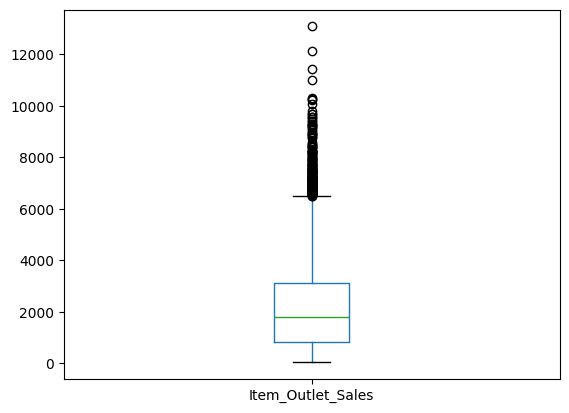

In [18]:
df.boxplot(column =['Item_Outlet_Sales'], grid = False)


In [19]:
q1 = df['Item_Outlet_Sales'].quantile(0.25)
q3 = df['Item_Outlet_Sales'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df['Sales'] = df['Item_Outlet_Sales'].clip(lower=lower_bound, upper=upper_bound)

In [20]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_encoded,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,5195,...,0,0,0,1,0,0,1,0,0,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,871,...,0,1,0,1,0,0,0,1,0,443.4228


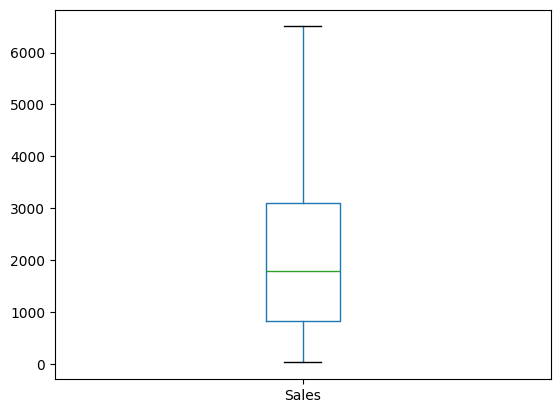

In [21]:
from matplotlib import pyplot as plt


df.boxplot(column =['Sales'], grid = False)

plt.show()

In [22]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_encoded,Item_Type_encoded,Item_Fat_Content_encoded_LF,Item_Fat_Content_encoded_REG,Item_Fat_Content_encoded_Unknown,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,2179.510266,2180.834800,0.610231,0.013728,0.376041,...,0.326763,0.393054,0.109351,0.327702,0.280183,0.127068,0.654347,0.108882,0.109703,2156.313016
std,4.643456,0.051598,62.275067,8.371760,1706.499616,1091.331352,117.594902,0.487726,0.116365,0.484419,...,0.469057,0.488457,0.312098,0.469403,0.449115,0.333069,0.475609,0.311509,0.312538,1624.863069
min,4.555000,0.000000,31.290000,1985.000000,33.290000,344.000000,1926.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,1354.000000,2132.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,2055.000000,2225.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,2926.000000,2277.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,5852.000000,2374.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6501.869900


In [23]:
processed_columns = [
    'Item_Weight',
    'Item_Visibility',
    'Item_MRP',
    'Outlet_Establishment_Year',
    'Item_Identifier_encoded',
 'Item_Type_encoded',
 'Item_Fat_Content_encoded_LF',
 'Item_Fat_Content_encoded_REG',
 'Item_Fat_Content_encoded_LF',
 'Item_Fat_Content_encoded_REG',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Size_High',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2',
 'Outlet_Type_Supermarket Type3',
 'Sales'
]

In [25]:
df.to_csv("train.csv", index=False)